# Problem Statement
The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset 
data = pd.read_csv("Housing.csv")
data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
78,6650000,5700,3,1,1,yes,yes,yes,no,yes,2,yes,furnished
190,5040000,7600,4,1,2,yes,no,no,no,yes,2,no,furnished
332,3920000,5500,4,1,2,yes,yes,yes,no,no,0,no,semi-furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished


In [3]:
# making copy of data
df = data.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EDA

In [4]:
df.shape #545 rows and 13 columns

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


All data types are appropriate so no need to change data type for any column

In [6]:
# Looking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no missing values in data set

In [7]:
# Looking for duplicat values
df.duplicated().sum()

0

There are no duplicate values in data set

In [8]:
# Looking for unique values in column
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

No column holds a single value. Each column as atleast 2 or more than 2 values

In [9]:
# Statistical distribution of data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


* PRICE
    - Average price of house is around 4.76 million. 
    - Maximum Price is 13.3 million.
    - Minimum Price is 1.75 million.<br><br>
* AREA
    - Average area of house is around 5150 sq.ft
    - Maximum area is 16200 sq.ft
    - Minimum area is 1650 sq.ft<br><br>
* BEADROOMS
    - Number of bedroom can vary from minmum 1 to maximum 6<br><br>
* BATHROOMS
    - Number of bathroom can vary from minmum 1 to maximum 4<br><br>
* STORIES
    - Number of stories ie floors can vary from minmum 1 to maximum 4<br><br>   
* PARKING
    - Parking space can vary from minmum 0 ie no parking space to maximum 3<br><br>

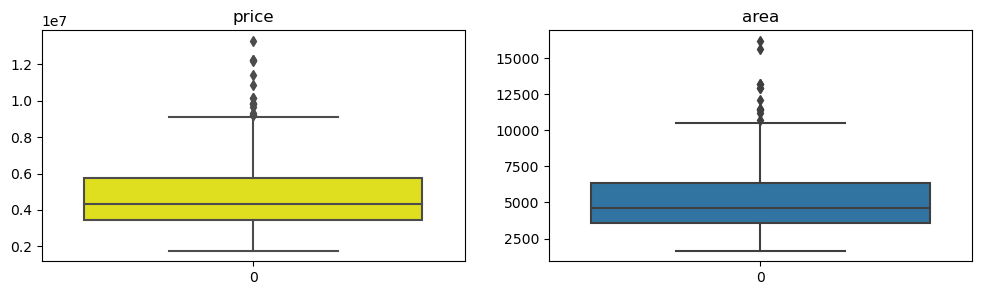

In [10]:
# looking for outliers
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
sns.boxplot(df["price"], color="yellow")
plt.title("price")

plt.subplot(1,2,2)
sns.boxplot(df["area"])
plt.title("area")

plt.show()

Both Price and Area has outliers, So we will have to treat those outliers

In [11]:
# Identifying outliers Price
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

IQR = Q3-Q1

lower_bond = Q1 - (1.5) * (IQR)
upper_bond = Q3 + (1.5) * (IQR)
outlier = df[(df["price"]>lower_bond)&(df["price"]>upper_bond)]
print("Outliers Price: {}".format(outlier.shape[0]))
outlier.head()

Outliers Price: 15


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


We have 15 outliers in Price column, we can replace this my mean value but we will drop this 15 rows as it consists only 2.75 % of total data

In [12]:
# Removeing outlier for price
df = df[(df["price"]>=lower_bond) & (df["price"]<=upper_bond)]
print(df.shape)

(530, 13)


In [13]:
# Identifying outliers Area
Q1 = df["area"].quantile(0.25)
Q3 = df["area"].quantile(0.75)

IQR = Q3-Q1

lower_bond = Q1 - (1.5) * (IQR)
upper_bond = Q3 + (1.5) * (IQR)
outlier = df[(df["area"]>lower_bond)&(df["area"]>upper_bond)]
print("Outliers in Area: {}".format(outlier.shape[0]))
outlier.head()

Outliers in Area: 13


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished


We have 13 outliers in Area column, we can replace this my mean value but we will drop this 13 rows as it consists only 2.38 % of total data

In [14]:
# Removeing outlier for area
df = df[(df["area"]>=lower_bond) & (df["area"]<=upper_bond)]
print(df.shape)

(517, 13)


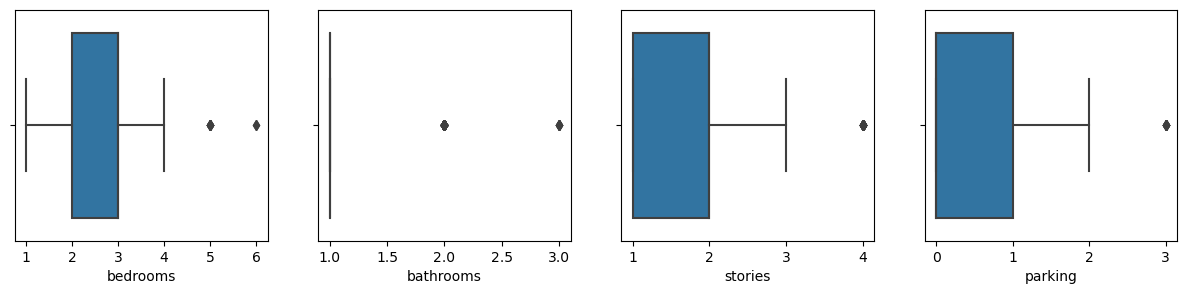

In [15]:
# Plotting box plot for different features to see outliers

plt.figure(figsize=(15,3))

plt.subplot(1,4,1)
sns.boxplot(x=df["bedrooms"])

plt.subplot(1,4,2)
sns.boxplot(x=df["bathrooms"])

plt.subplot(1,4,3)
sns.boxplot(x=df["stories"])

plt.subplot(1,4,4)
sns.boxplot(x=df["parking"])

plt.show()

- 2 houses has 5 and 6 bedrooms
- 2 houses has 2 and 3 bathrooms
- 1 house in data is of 4 stores
- 1 house has 3 parking in data

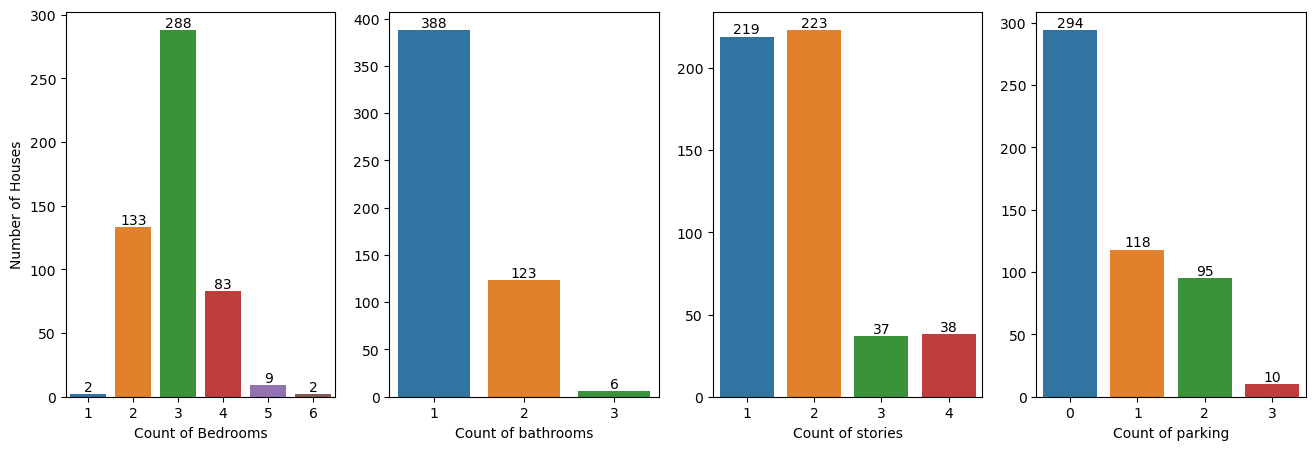

In [16]:
# Seeing number of houses with respect to bedrooms, bathrooms, stories and parking

plt.figure(figsize=(16,5))

plt.subplot(1,4,1)
ax1 = sns.countplot(data=df, x="bedrooms")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Number of Houses")
ax1.bar_label(ax1.containers[0])

plt.subplot(1,4,2)
ax2 = sns.countplot(data=df, x="bathrooms")
plt.xlabel("Count of bathrooms")
plt.ylabel("")
ax2.bar_label(ax2.containers[0])

plt.subplot(1,4,3)
ax3 = sns.countplot(data=df, x="stories")
plt.xlabel("Count of stories")
plt.ylabel("")
ax3.bar_label(ax3.containers[0])

plt.subplot(1,4,4)
ax4 = sns.countplot(data=df, x="parking")
plt.xlabel("Count of parking")
plt.ylabel("")
ax4.bar_label(ax4.containers[0])

plt.show()

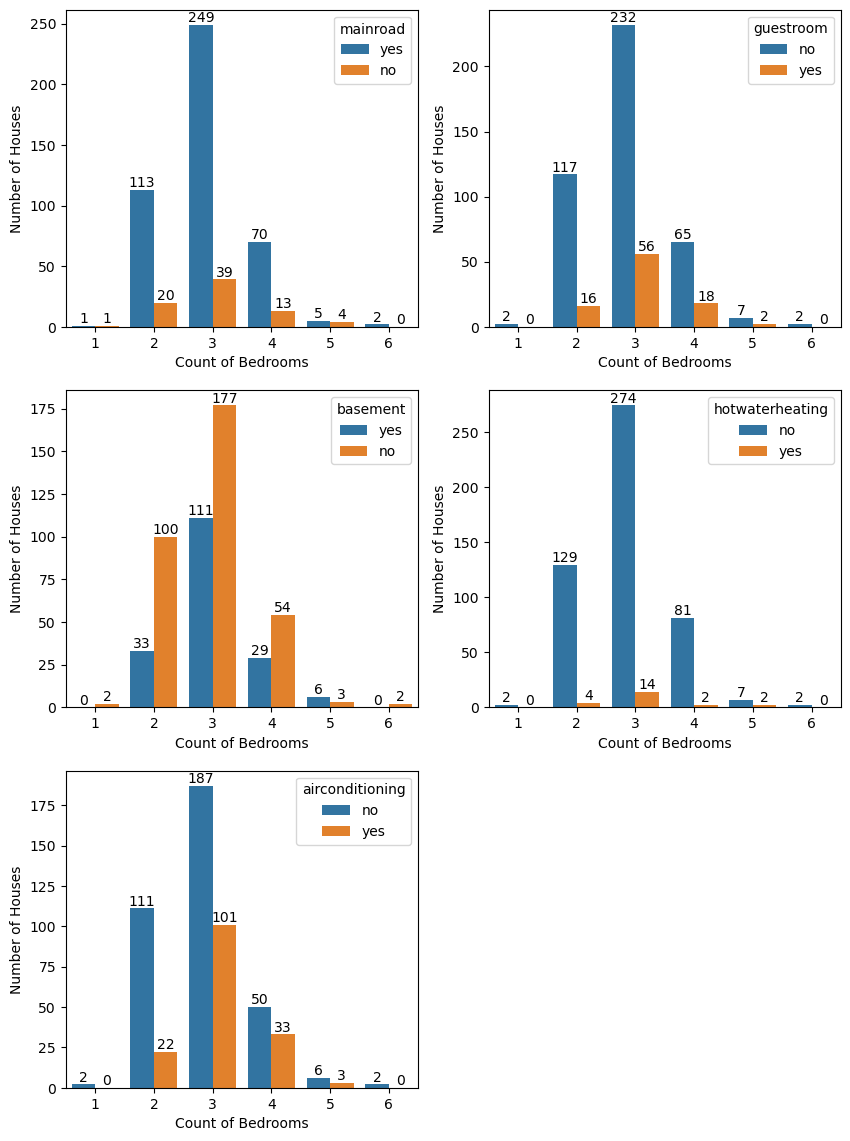

In [17]:
# Seeing number of bedrooms with respect to mainroad, guestroom, basement, hotwaterheating and airconditioning

plt.figure(figsize=(10,14))

plt.subplot(3,2,1)
ax1 = sns.countplot(data=df, x="bedrooms", hue="mainroad")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Number of Houses")
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])

plt.subplot(3,2,2)
ax2 = sns.countplot(data=df, x="bedrooms", hue="guestroom")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Number of Houses")
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])

plt.subplot(3,2,3)
ax3 = sns.countplot(data=df, x="bedrooms", hue="basement")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Number of Houses")
ax3.bar_label(ax3.containers[0])
ax3.bar_label(ax3.containers[1])

plt.subplot(3,2,4)
ax4 = sns.countplot(data=df, x="bedrooms", hue="hotwaterheating")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Number of Houses")
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])

plt.subplot(3,2,5)
ax5 = sns.countplot(data=df, x="bedrooms", hue="airconditioning")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Number of Houses")
ax5.bar_label(ax5.containers[0])
ax5.bar_label(ax5.containers[1])

plt.show()

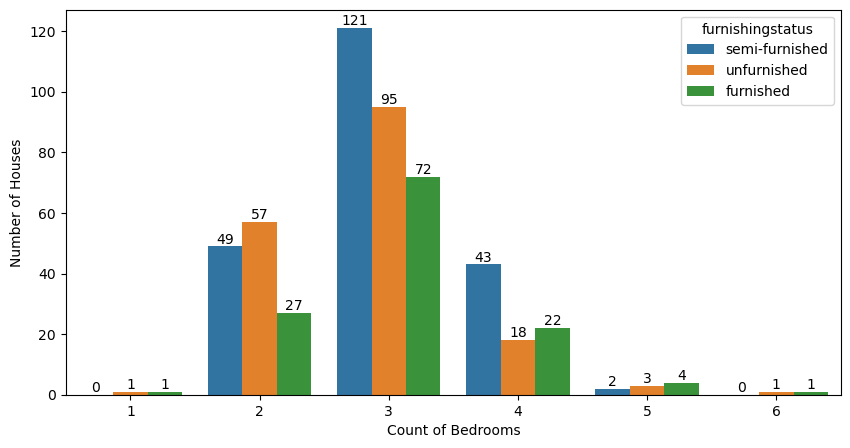

In [18]:
plt.figure(figsize=(10,5))
ax1 = sns.countplot(data=df, x="bedrooms", hue="furnishingstatus")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Number of Houses")
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])
plt.show()

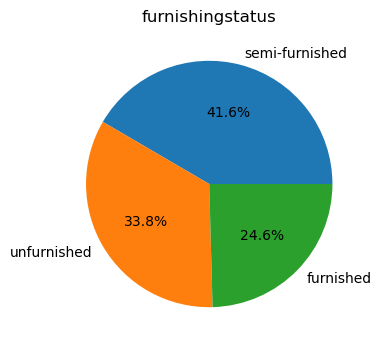

In [19]:
# Pie chart for furnishingstatus
plt.figure(figsize=(4,4))
df["furnishingstatus"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title("furnishingstatus")
plt.show()

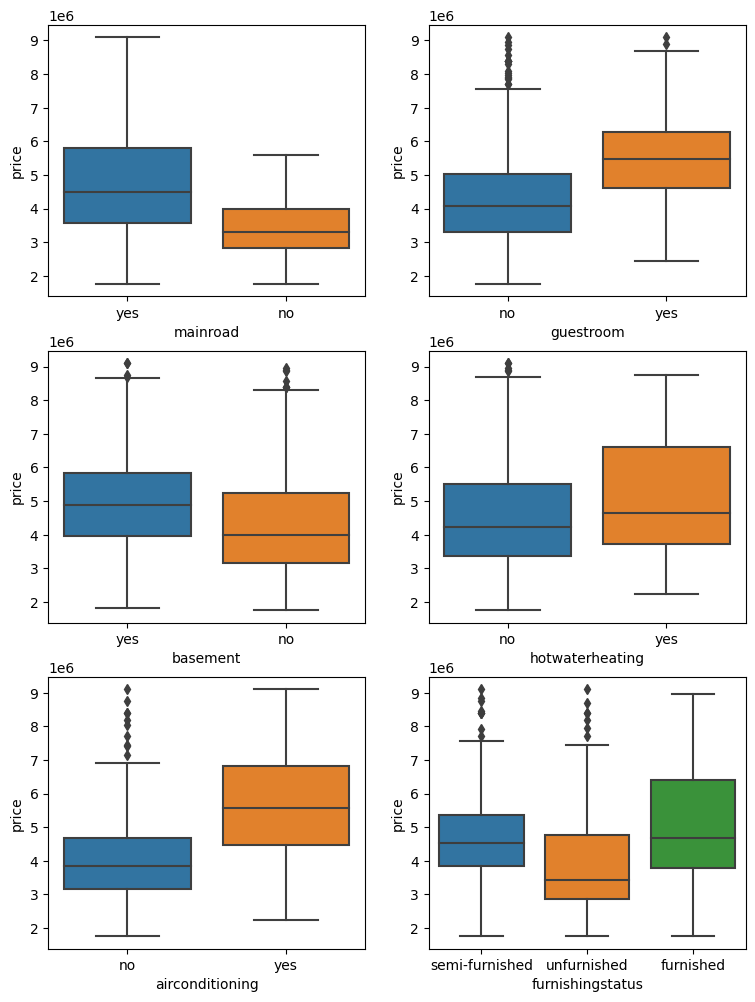

In [20]:
plt.figure(figsize=(9,12))
plt.subplot(3,2,1)
sns.boxplot(data=df, x="mainroad", y="price")

plt.subplot(3,2,2)
sns.boxplot(data=df, x="guestroom", y="price")

plt.subplot(3,2,3)
sns.boxplot(data=df, x="basement", y="price")

plt.subplot(3,2,4)
sns.boxplot(data=df, x="hotwaterheating", y="price")

plt.subplot(3,2,5)
sns.boxplot(data=df, x="airconditioning", y="price")

plt.subplot(3,2,6)
sns.boxplot(data=df, x="furnishingstatus", y="price")
plt.show()

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


#### We have catogrical columns as mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea and furnishingstatus
- We will use binary conversion for mainroad, guestroom, basement, hotwaterheating, airconditioning and prefarea
- We will use one hot encodong

In [22]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
# list of categorical columns names
categorical = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
categorical

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [24]:
# binary conversion of categorical colmun
def binar_conversion(x):
    return x.map({"yes": 1, "no":0})

In [25]:
df[categorical] = df[categorical].apply(binar_conversion)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


#### Encoding furnishingstatus separatly because it has three categories as furnished, unfurnished, semi-furnished

In [26]:
# One-hot encoding for the furnishingstatus column
df_encoded = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Show the updated DataFrame
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


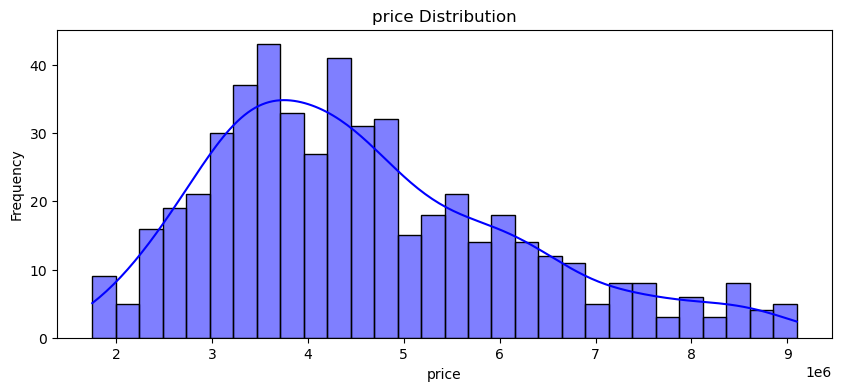

In [27]:
# Histogram of price
plt.figure(figsize=(10,4))
sns.histplot(df_encoded["price"], bins=30 ,kde=True, color="blue")
plt.title('price Distribution')
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

In [28]:
print("Skewness: %f" % df_encoded['price'].skew())
print("Kurtosis: %f" % df_encoded['price'].kurt())

Skewness: 0.741014
Kurtosis: 0.055902


- A skewness value greater than 0 indicates that the distribution is positively skewed (right-tailed). This means that there are a few high-value outliers that are pulling the mean to the right of the median.
- The kurtosis value indicates the "tailedness" of the distribution. A value is around 0 typically suggests a normal distribution. 

### Using Log Transformation for normalizing price column

In [29]:
# Applying log transformation to the 'price' column
df_encoded['log_price'] = np.log(df_encoded['price'])

print("Skewness: %f" % df_encoded['log_price'].skew())
print("Kurtosis: %f" % df_encoded['log_price'].kurt())

Skewness: -0.043992
Kurtosis: -0.356151


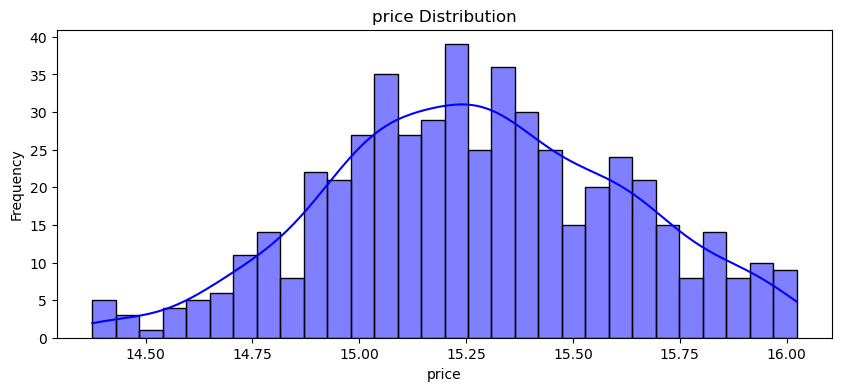

In [30]:
# Histogram of price
plt.figure(figsize=(10,4))
sns.histplot(df_encoded['log_price'], bins=30 ,kde=True, color="blue")
plt.title('price Distribution')
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

In [31]:
df_encoded.drop(columns="price", axis=1, inplace=True)

In [32]:
df_encoded.rename(columns={"log_price": "price"}, inplace=True)

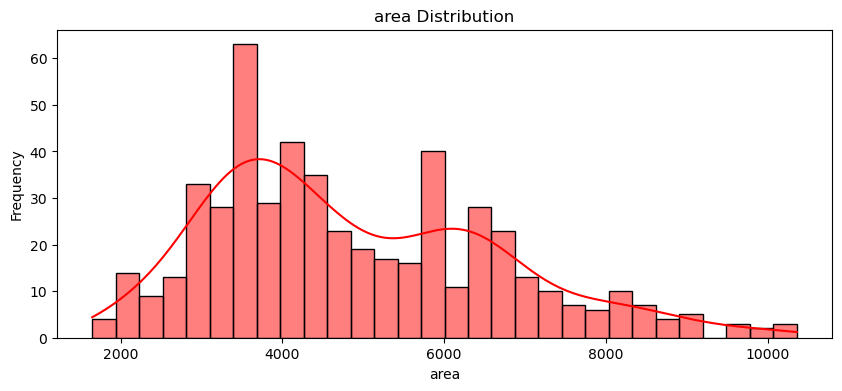

In [33]:
# Histogram of area
plt.figure(figsize=(10,4))
sns.histplot(df_encoded["area"], bins=30 ,kde=True, color="red")
plt.title('area Distribution')
plt.xlabel("area")
plt.ylabel("Frequency")
plt.show()

In [34]:
print("Skewness: %f" % df_encoded['area'].skew())
print("Kurtosis: %f" % df_encoded['area'].kurt())

Skewness: 0.657846
Kurtosis: -0.127976


In [35]:
# Applying log transformation to the 'area' column
df_encoded['log_area'] = np.log(df_encoded['area'])

print("Skewness: %f" % df_encoded['log_area'].skew())
print("Kurtosis: %f" % df_encoded['log_area'].kurt())

Skewness: -0.092438
Kurtosis: -0.511188


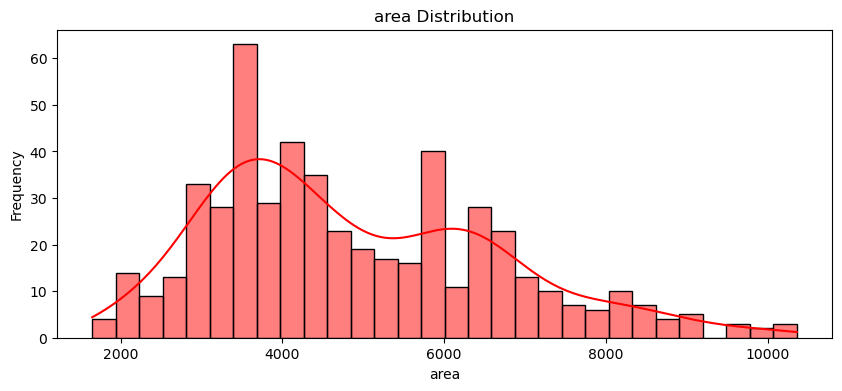

In [36]:
# Histogram of area
plt.figure(figsize=(10,4))
sns.histplot(df_encoded["area"], bins=30 ,kde=True, color="red")
plt.title('area Distribution')
plt.xlabel("area")
plt.ylabel("Frequency")
plt.show()

In [37]:
df_encoded.drop(columns="area", axis=1, inplace=True)
df_encoded.rename(columns={"log_area": "area"}, inplace=True)

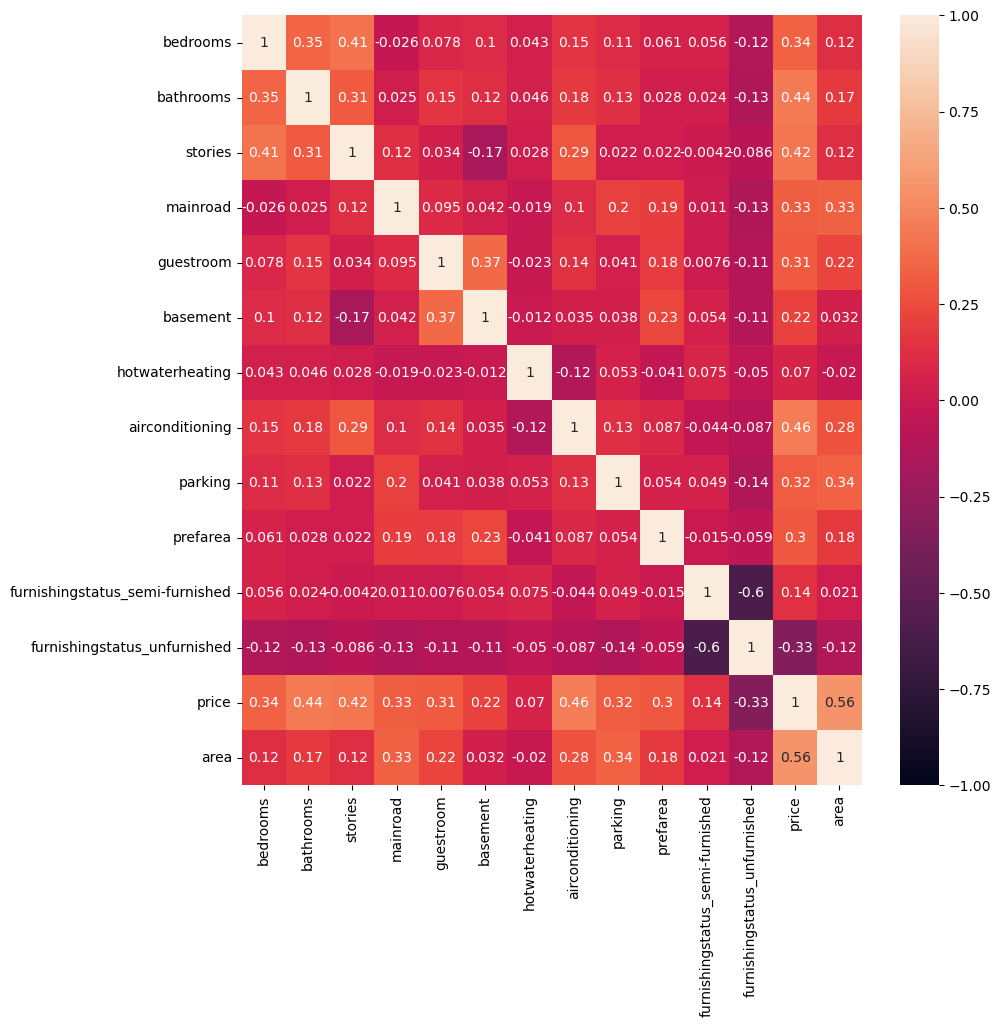

In [38]:
corr_df = df_encoded.corr(method="pearson")

plt.figure(figsize = (10, 10))
sns.heatmap(corr_df, vmax=1.0, vmin=-1.0, annot=True)
plt.show()

- There is strong correlation between area and price
- Also bathrooms and stories has good correlation with price
- There is no multicolinearity in dependent variables

In [39]:
features = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished','area']

In [40]:
# extracting features 
X = df_encoded[features]
y = df_encoded['price']

print(X.shape)
print(y.shape)

(517, 13)
(517,)


In [41]:
# performing train test split

from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=10) 

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 13)
(104, 13)
(413,)
(104,)


# Normalization
- Values in column price and area are high compare to other columns which can make model baise, so we need to bring all values in same scale for which we will use RobustScaler from sklearn
- RobustScaler is robust towards outliers

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(X_train) 

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


# Model Building

In [44]:
from sklearn.linear_model import LinearRegression

# creat a model object 
lr = LinearRegression()

# train the model object
lr.fit(X_train_scale, y_train)

LinearRegression()

In [45]:
# print intercept and coefficients
print (lr.intercept_)
print (lr.coef_)

15.15563415851961
[ 0.04037957  0.14142728  0.08071987  0.10450088  0.05649725  0.07629322
  0.16020851  0.18031864  0.03811357  0.13337405  0.01380945 -0.11040467
  0.15848059]


In [46]:
# pair the feature names with the coefficients
print(list(zip(X, lr.coef_)))

[('bedrooms', 0.04037956638090884), ('bathrooms', 0.1414272777108925), ('stories', 0.08071986629336417), ('mainroad', 0.10450088372514388), ('guestroom', 0.056497246652394764), ('basement', 0.07629321760322226), ('hotwaterheating', 0.16020850923473384), ('airconditioning', 0.1803186397165705), ('parking', 0.03811357124132618), ('prefarea', 0.1333740462073588), ('furnishingstatus_semi-furnished', 0.013809445038394376), ('furnishingstatus_unfurnished', -0.11040466677045888), ('area', 0.15848059261647066)]


In [47]:
y_pred = lr.predict(X_test_scale)
print(y_pred)

[15.35352952 15.14328829 14.94279214 15.52847117 15.00782716 15.56679523
 14.89652732 15.73191123 15.65464382 15.09090411 15.41747229 15.04160327
 15.8136161  15.21950653 15.2284435  15.13789032 15.38793746 15.10342137
 15.53586338 15.0783424  15.19964125 15.00859404 15.59291102 15.36398717
 15.15032252 15.4273271  15.13136598 15.63324388 15.00525435 15.63023887
 15.40015657 15.56127331 14.76306581 15.27008966 15.14871678 14.86331154
 15.17891642 15.00432228 15.52446595 15.14794357 15.23314447 14.9693407
 15.35100795 15.13083788 15.17819738 14.89454704 15.22062266 15.02886483
 15.29051663 15.3097871  14.86173163 15.59468721 15.81592434 15.02573625
 15.05494909 15.24872558 15.17484346 15.9072832  14.88558452 15.10108376
 15.04083724 15.46069456 15.00360948 15.33259553 15.10405242 15.76794779
 15.43570577 15.11343327 14.94611158 15.25344134 14.98435708 15.24869051
 15.71382367 15.44443281 15.56051585 15.58845014 15.22554813 15.51311023
 15.23788143 15.46700547 15.53560561 15.03825768 15.

In [48]:
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Price"] = y_test
new_df["Predicted Price"] = y_pred
new_df

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,Actual Price,Predicted Price
320,3,1,2,1,0,0,0,0,2,1,0,0,8.371011,15.216694,15.353530
363,2,1,1,1,0,0,1,0,0,0,1,0,8.184235,15.126542,15.143288
536,5,1,2,0,0,0,0,0,0,0,0,1,8.137396,14.488455,14.942792
378,3,1,3,1,0,0,1,1,0,1,1,0,7.729735,15.107494,15.528471
189,2,1,1,0,1,1,0,0,0,0,1,0,8.171882,15.432917,15.007827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,3,1,2,1,0,0,0,0,0,0,0,1,8.268732,15.291417,15.004195
293,2,1,1,0,0,0,0,0,1,0,0,1,8.391630,15.250595,14.851950
237,3,1,2,1,0,1,0,0,0,0,1,0,8.519191,15.345905,15.276522
128,3,1,3,1,1,0,0,1,1,0,0,0,8.612503,15.585876,15.568826


In [49]:
from sklearn.metrics import r2_score, mean_squared_error

r2=r2_score(y_test,y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)


R Square:  0.5178496647402333
Adjusted R Square:  0.4482057274249337
RMSE:  0.21766639341891675


In [50]:
new_df["residu"] = new_df["Actual Price"]-new_df["Predicted Price"] 
new_df

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,Actual Price,Predicted Price,residu
320,3,1,2,1,0,0,0,0,2,1,0,0,8.371011,15.216694,15.353530,-0.136836
363,2,1,1,1,0,0,1,0,0,0,1,0,8.184235,15.126542,15.143288,-0.016746
536,5,1,2,0,0,0,0,0,0,0,0,1,8.137396,14.488455,14.942792,-0.454337
378,3,1,3,1,0,0,1,1,0,1,1,0,7.729735,15.107494,15.528471,-0.420977
189,2,1,1,0,1,1,0,0,0,0,1,0,8.171882,15.432917,15.007827,0.425089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,3,1,2,1,0,0,0,0,0,0,0,1,8.268732,15.291417,15.004195,0.287222
293,2,1,1,0,0,0,0,0,1,0,0,1,8.391630,15.250595,14.851950,0.398646
237,3,1,2,1,0,1,0,0,0,0,1,0,8.519191,15.345905,15.276522,0.069383
128,3,1,3,1,1,0,0,1,1,0,0,0,8.612503,15.585876,15.568826,0.017050


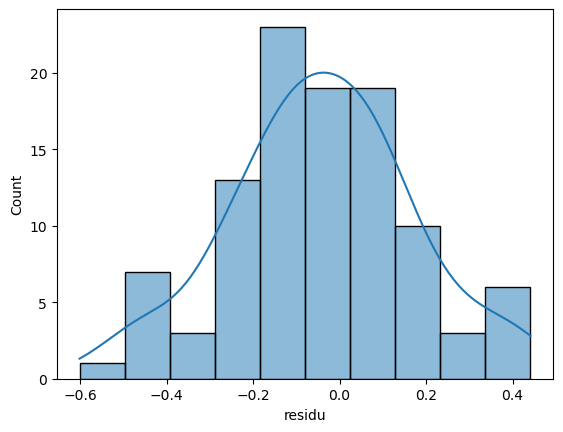

In [51]:
# distribution of residues
sns.histplot(new_df['residu'], kde=True)
plt.show()

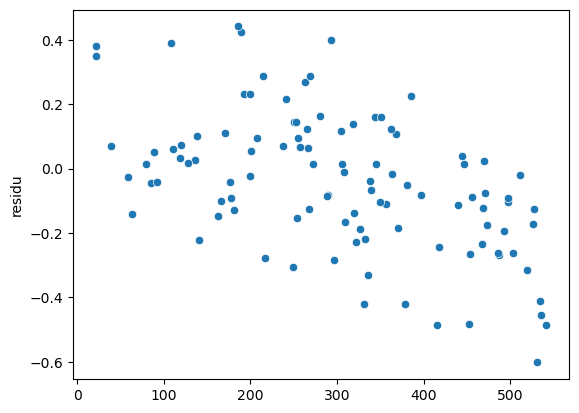

In [52]:
sns.scatterplot(new_df['residu'])
plt.show()

- Distribution of residu is normal distribution
- Scatter plot of residu shows that there is equal spared or scatter through out

# Analysis 

**PRICE**<br>
    - Average price of house is around 4.76 million.<br>
    - Maximum Price is 13.3 million.<br>
    - Minimum Price is 1.75 million.<br>
**AREA**
    - Average area of house is around 5150 sq.ft<br>
    - Maximum area is 16200 sq.ft<br>
    - Minimum area is 1650 sq.ft<br>
**BEADROOMS**<br>
    - Number of bedroom can vaary from minmum 1 to maximum 6<br>
**BATHROOMS**<br>
    - Number of bathroom can vaary from minmum 1 to maximum 4<br>
**STORIES**<br>
    - Number of stories ie floors can vaary from minmum 1 to maximum 4<br>
**PARKING**<br>
    - Parking space can varry from minmum 0 ie no parking space to maximum 3<br>

**Count of houses with respect to bed rooms:**<br>
*1 Bedroom* - 2<br>
*2 Bedroom* - 133<br>
*3 Bedroom* - 288<br>
*4 Bedroom* - 83<br>
*5 Bedroom* - 9<br>
*6 Bedroom* - 2<br>

**Percentage distribution of furnished, semi-furnished and unfurnished flats:**<br>
1. Furnished: 24.6%
2. Semi-furnished: 41.6%
3. Umfurnished: 33.8%<br>

**Number of flats with hot water facility:** 24<br>
**Number of flats with airconditioning facility:** 159

# Steps performed:

**1. Data Loading & Exploration:**<br>
The dataset was loaded, and some exploratory data analysis (EDA) was performed, including visualizations such as count plots, pie chart, histrogram , box plot and heatmap to understand the relationships between variables.<br>
**2. Data Preprocessing:**<br>
Removed out liers<br>
Numerical features were scaled, and categorical variables were encoded using different encoding techniques.<br>
**3. Model Training:**<br>
Trained a linear regression model using Scikit-learn to predict house prices based on features such as area, bedrooms, bathrooms,parking etc<br>
**4. Model Evaluation:**<br>
The model was evaluated using metrics such as R-squared, Adjusted R-squared and Mean Squared Error (MSE) to assess its accuracy and fit.<br>
**5. Residual Analysis:**<br>
The residuals were analyzed to check if they followed a normal distribution and were evenly spread, ensuring no systematic bias in the predictions.

# Key Findings
**Good Fit:**<br>The linear regression model provides a reasonable fit, as indicated by the R-squared value, though there might still be room for improvement.<br>
**Residuals:**<br>
The scatter plot of residuals shows that they are evenly spread and follow a normal distribution, indicating that the assumptions of the linear regression model hold.<br>
**Feature Importance:**<br>
Some features might be more significant in predicting house prices than others, which could be further explored to enhance the model’s performance.